# Generate Heatmaps on Misclassified Images and Single Images by Filename

In [1]:
%matplotlib inline

### Start a CAS session

In [2]:
import swat

sess = swat.CAS(cashost, casport)


### Import Image Data

In [3]:
import dlpy
from dlpy.images import ImageTable


`img_path` should be a fully-qualified directory that is accessible by the CAS server session.
The folder structure is as follows:

   * Giraffe_Dolphin
       * Giraffe
           * Giraffe image 1
           * Girrafe image 2
           * ...
       * Dolphin
           * Dolphin image 1
           * Dolphin image 2
           * ...
           
We are using giraffe and dolphin images in this example.  Your case may differ.

In [4]:
img_path='/path/to/images/Giraffe_Dolphin'

my_images = ImageTable.load_files(sess, path=img_path)

In [5]:
my_images.image_summary

jpg                  2148
minWidth              170
maxWidth             1024
minHeight             127
maxHeight            1025
meanWidth         878.341
meanHeight         739.63
mean1stChannel    127.204
min1stChannel           0
max1stChannel         255
mean2ndChannel    125.531
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    103.978
min3rdChannel           0
max3rdChannel         255
dtype: object

#### Resize images to match model input

In [6]:
my_images.resize(width=224)

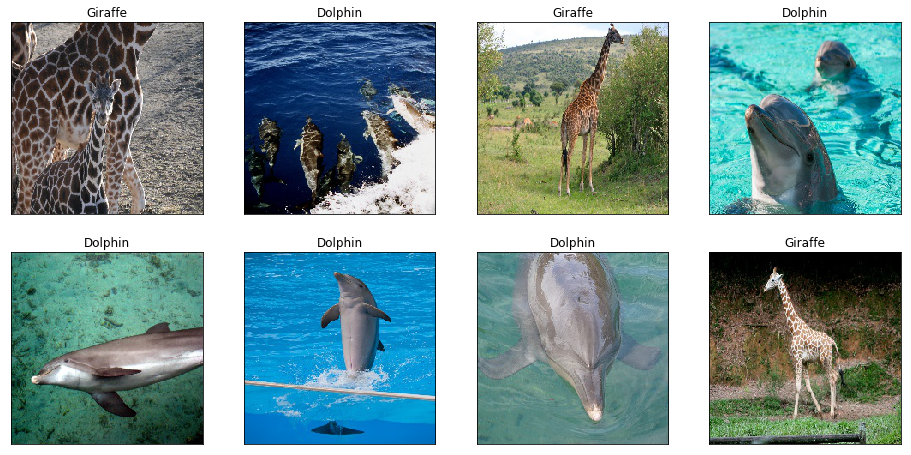

In [7]:
my_images.show(8, 4)

In [8]:
from dlpy.splitting import two_way_split

In [9]:
tr_img, te_img = two_way_split(my_images, test_rate=20, seed=123)
tr_img.label_freq

Frequency for IMAGEDATA_UU1FEG

         Level  Frequency
Dolphin      1        757
Giraffe      2        962

### Reload a Model from a sashdat file

In [10]:
from dlpy import Model, Sequential
from dlpy.layers import * 
from dlpy.applications import *

In [11]:
model_r = Model(sess)
model_file = '/path/to/trained/model/Dol_Gir_CNN.sashdat'
model_r.load(path=model_file)

NOTE: Model table is loaded successfully!
NOTE: Model is renamed to "dol_gir_cnn" according to the model name in the table.
NOTE: Dol_Gir_CNN_weights.sashdat is used as model weigths.
NOTE: Model weights attached successfully!
NOTE: Dol_Gir_CNN_weights_attr.sashdat is used as weigths attribute.
NOTE: Model attributes attached successfully!


### Run Prediction on test images

In [12]:
model_r.predict(te_img)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read           429
 1  Number of Observations Used           429
 2  Misclassification Error (%)      3.496503
 3                   Loss Error      0.066165

[OutputCasTables]

             casLib              Name  Rows  Columns  \
 0  CASUSER(adstev)  Valid_Res_gXTSM0   429        9   
 
                                             casTable  
 0  CASTable('Valid_Res_gXTSM0', caslib='CASUSER(a...  

+ Elapsed: 1.07s, user: 43.9s, sys: 4.14s, mem: 3.57e+03mb

### Run heatmap on validation set containing correct and incorrect predections

#### When an ImageTable is passed to data the predictions are run again. To  avoid running again do not pass an ImageTable, the previously calculated results from model_r.predict(te_img) are used.


NOTE: The number of images in the table is too large, only 5 randomly selected images are used in analysis.
NOTE: Table IMAGEDATA_I8C9UP contains compressed images.


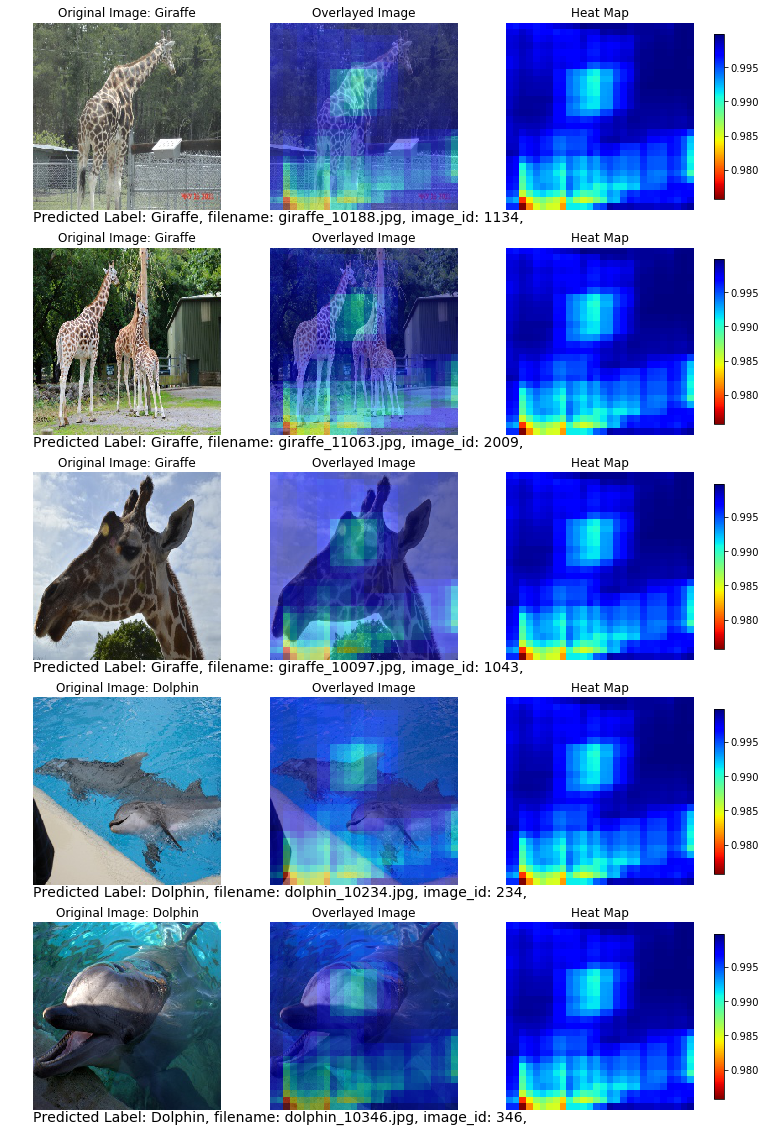

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Giraffe      3.550998e-04      9.996449e-01  giraffe_10188.jpg  1134   
1   Giraffe      3.475916e-07      9.999996e-01  giraffe_11063.jpg  2009   
2   Giraffe      4.235358e-03      9.957646e-01  giraffe_10097.jpg  1043   
3   Dolphin      9.999996e-01      3.572753e-07  dolphin_10234.jpg   234   
4   Dolphin      9.999843e-01      1.569275e-05  dolphin_10346.jpg   346   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   

                                            heat_map  
0  [[0.9966435432434082, 0.9966435432434082, 0.99...  
1  [[0.9966435432434082, 0.9966435432434082, 0.99...  
2  [[0.9966435432434082, 0.9966435432434082, 0.99...  
3  [[0.9966435432434082, 0.9966435432434082, 0.99...  
4  [[0.9966435432434082, 0.9966435432434082, 0.99...

In [13]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8)

#### Running heat_map_analysis without a data input avoids running the prediction calculations again

Using results from model.predict()
NOTE: The number of images in the table is too large, only 5 randomly selected images are used in analysis.
NOTE: Table IMAGEDATA_FUP14J contains compressed images.


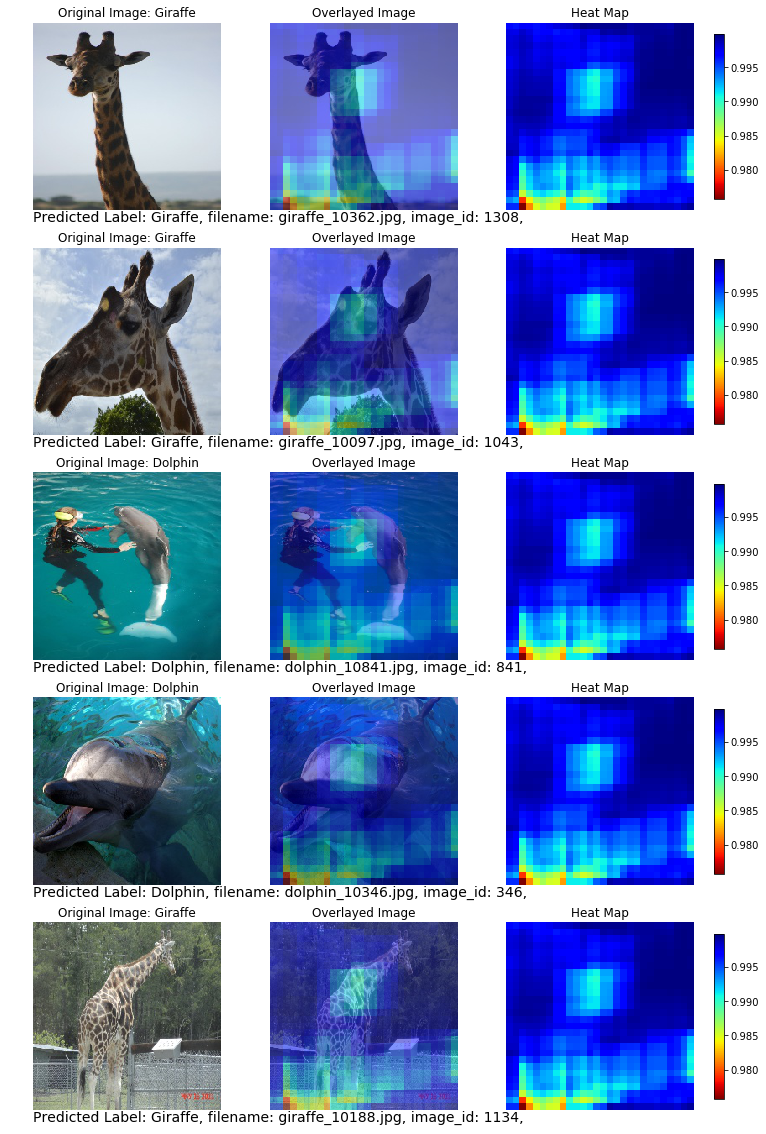

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Giraffe          0.000141      9.998592e-01  giraffe_10362.jpg  1308   
1   Giraffe          0.004235      9.957646e-01  giraffe_10097.jpg  1043   
2   Dolphin          1.000000      2.660829e-11  dolphin_10841.jpg   841   
3   Dolphin          0.999984      1.569275e-05  dolphin_10346.jpg   346   
4   Giraffe          0.000355      9.996449e-01  giraffe_10188.jpg  1134   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   

                                            heat_map  
0  [[0.9966435432434082, 0.9966435432434082, 0.99...  
1  [[0.9966435432434082, 0.9966435432434082, 0.99...  
2  [[0.9966435432434082, 0.9966435432434082, 0.99...  
3  [[0.9966435432434082, 0.9966435432434082, 0.99...  
4  [[0.9966435432434082, 0.9966435432434082, 0.99...

In [14]:
model_r.heat_map_analysis(mask_width=56, mask_height=56, step_size=8)

### Most of these heatmaps are correct classifications, lets see some heatmaps of misclassifications

Use the img_type parameter to 'M' misclassified, 'C' correct classification, or 'A' for all

NOTE: The number of images in the table is too large, only 5 randomly selected images are used in analysis.
NOTE: Table IMAGEDATA_YQANGB contains compressed images.


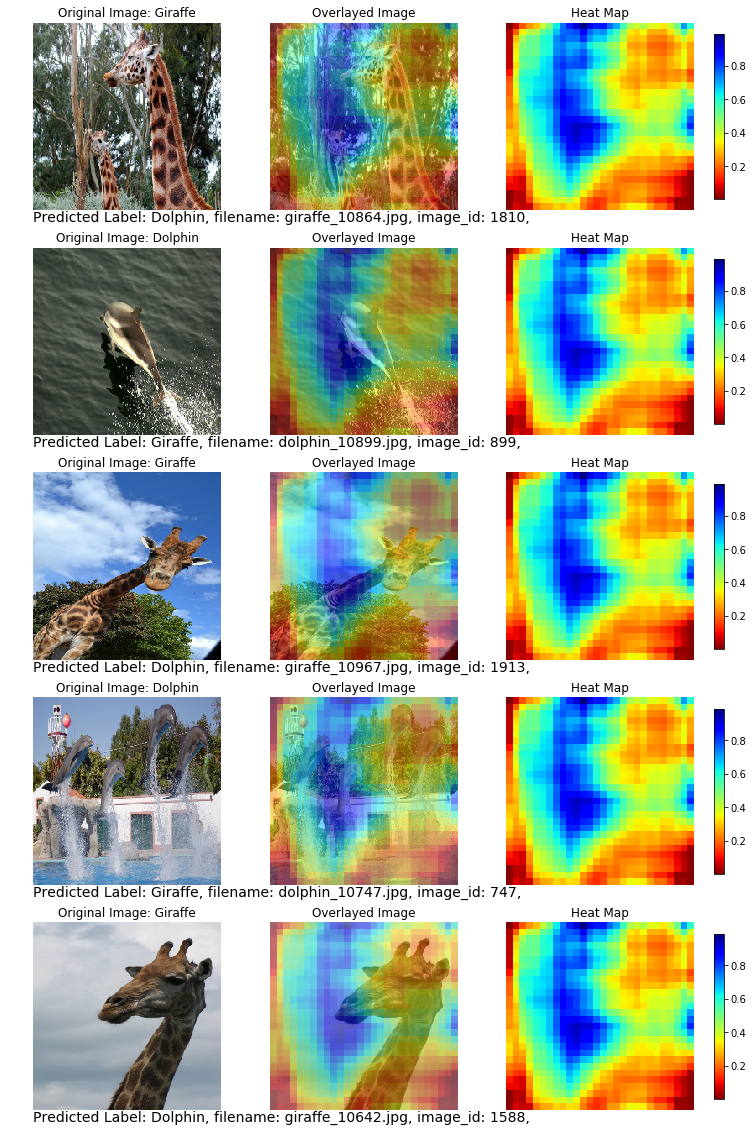

In [15]:
misclass = model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='M')

In [16]:
misclass

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Dolphin          0.821225          0.178775  giraffe_10864.jpg  1810   
1   Giraffe          0.464863          0.535137  dolphin_10899.jpg   899   
2   Dolphin          0.655028          0.344972  giraffe_10967.jpg  1913   
3   Giraffe          0.041047          0.958953  dolphin_10747.jpg   747   
4   Dolphin          0.560915          0.439085  giraffe_10642.jpg  1588   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   

                                            heat_map  
0  [[0.0034804129973053932, 0.0034804129973053932...  
1  [[0.0034804129973053932, 0.0034804129973053932...  
2  [[0.0034804129973053932, 0.0034804129973053932...  
3  [[0.0034804129973053932, 0.0034804129973053932...  
4  [[0.0034804129973053932, 0.0034804129973053932...

### Perhaps you want to only observe the heatmaps of specific images by _filename_0
You can pass a single filename or a list of filenames

In [17]:
misclass['_filename_0'].tolist()

['giraffe_10864.jpg',
 'dolphin_10899.jpg',
 'giraffe_10967.jpg',
 'dolphin_10747.jpg',
 'giraffe_10642.jpg']

In [18]:
two_misclass_names = misclass['_filename_0'].tolist()[:2]

In [26]:
two_misclass_names

['giraffe_10864.jpg', 'dolphin_10899.jpg']

NOTE: Table VALID_RES_COMPLETE_BUECJD contains compressed images.


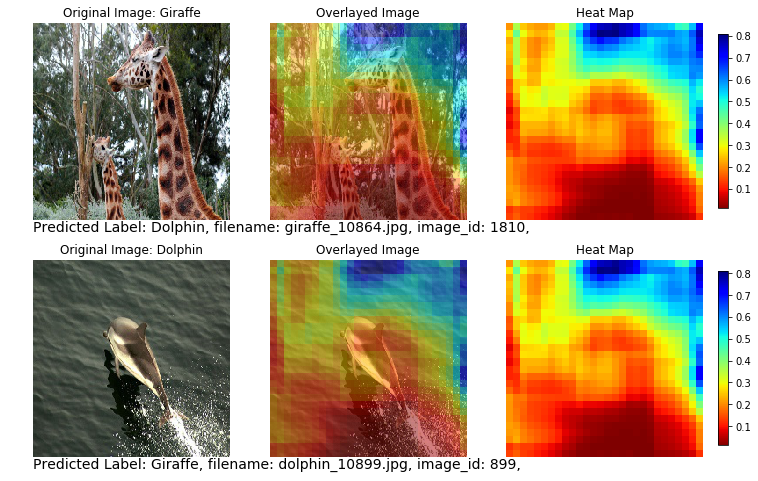

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Dolphin          0.821222          0.178778  giraffe_10864.jpg  1810   
1   Giraffe          0.464869          0.535131  dolphin_10899.jpg   899   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   

                                            heat_map  
0  [[0.20885129272937775, 0.20885129272937775, 0....  
1  [[0.20885129272937775, 0.20885129272937775, 0....

In [19]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='A', filename = two_misclass_names)

### Filenames are not necessarily unique so use the image_id of the images found in the _id_ column

If both the image_id and filename parameter are passed the image_id superscedes filename because image_is unique

In [20]:
my_list = te_img['_id_'].tolist()[:4]

In [21]:
my_list

[2009, 823, 1313, 1308]

NOTE: Table VALID_RES_COMPLETE_SQBOT7 contains compressed images.


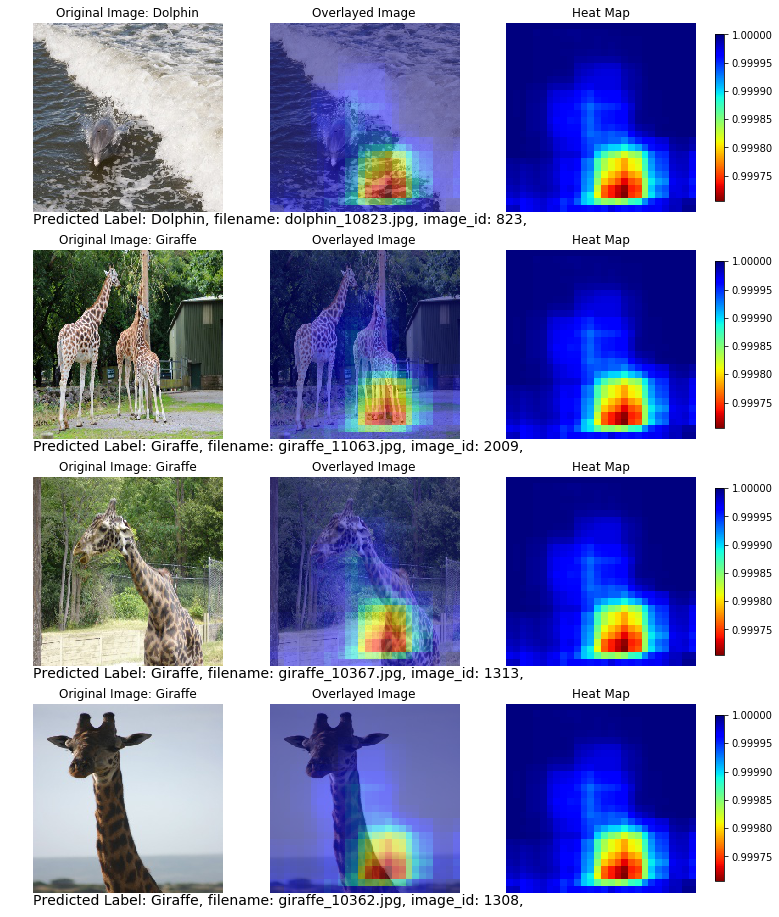

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Dolphin      9.927781e-01          0.007222  dolphin_10823.jpg   823   
1   Giraffe      3.476029e-07          1.000000  giraffe_11063.jpg  2009   
2   Giraffe      7.080004e-05          0.999929  giraffe_10367.jpg  1313   
3   Giraffe      1.408245e-04          0.999859  giraffe_10362.jpg  1308   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   

                                            heat_map  
0  [[0.9999992847442627, 0.9999992847442627, 0.99...  
1  [[0.9999992847442627, 0.9999992847442627, 0.99...  
2  [[0.9999992847442627, 0.9999992847442627, 0.99...  
3  [[0.9999992847442627, 0.9999992847442627, 0.99...

In [22]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='A', image_id = my_list)

In [23]:
my_list[0]

2009

In [24]:
single = my_list[0]

#### Or a single image id

NOTE: Table VALID_RES_COMPLETE_BLIMXI contains compressed images.


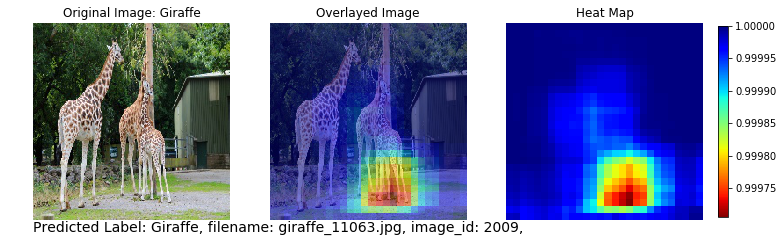

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Giraffe      3.476029e-07               1.0  giraffe_11063.jpg  2009   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   

                                            heat_map  
0  [[0.9999992847442627, 0.9999992847442627, 0.99...

In [25]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='A', image_id = single)